<a href="https://colab.research.google.com/github/AjinkyaRaghuwanshi/IMLAssignments/blob/master/SHALAAssignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In [0]:
import pandas as pd

In [45]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
atc = titanic_data.corr()
titanic_data.shape

(891, 12)

In [47]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


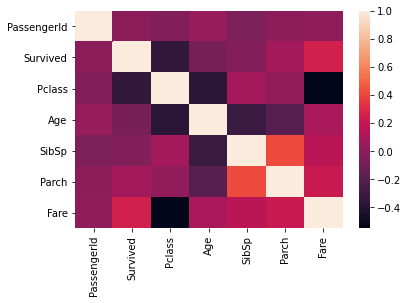

In [48]:
import seaborn as sns
sns.heatmap(atc)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from IPython.display import display


import csv
from sklearn import preprocessing

import seaborn as sns
from pylab import rcParams
import tensorflow as tf

from sklearn.preprocessing import scale, normalize
from math import *
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [51]:
# load data
df = titanic_data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing of data

Removing Null values from data

In [52]:
df.shape

(891, 12)

In [0]:
df.Age = df.Age.fillna(df.Age.mean())
df = df.drop(['Cabin'],axis="columns")
df = df.dropna(axis="rows")

In [57]:
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [58]:
df.shape

(889, 11)

Encoding Data

In [0]:
dummy0 = pd.get_dummies(df.Sex)
dummy1 = pd.get_dummies(df.Embarked)


In [60]:
merged =pd.concat([df,dummy0,dummy1],axis='columns')
display(merged)
final = merged.drop(['Name','Ticket','Sex','PassengerId','Embarked'],axis= 'columns')
display(final)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1,1,0,0


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [61]:
X = final.drop(['Survived'],axis= 'columns')
Y = final[['Survived']]

# encode = LabelEncoder()
print('Original Features: \n',list(X.columns),'\n')


Original Features: 
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S'] 



In [68]:
x.shape

(889, 10)

# XGBClassifier training and testing

In [62]:
#Normalizing X
cols = []
count = 1
for column in X.columns:
    if column == 'Human Resources':
        cols.append(f'Human Resources{count}')
        count+=1
        continue
    cols.append(column)
X.columns = cols

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

# display(X)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test0, y_train, y_test0 = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_test, X_test1, y_test, y_test1 = train_test_split(X_test0, y_test0, test_size=0.2, random_state=seed)

# # fit model no training data For XGBoost


classifier = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10000,
 max_depth=25,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=7)
classifier.fit(X_train,y_train)

y_predXG = classifier.predict(X_test)
predictionsXG = [round(value) for value in y_predXG]
# evaluate predictions
accuracy = accuracy_score(y_test, predictionsXG)
print(classification_report(y_test, predictionsXG))
print(confusion_matrix(y_test, predictionsXG))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictionsXG)
display(y_predXG)

print("\n \n \n")





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       141
           1       0.79      0.71      0.75        94

    accuracy                           0.81       235
   macro avg       0.80      0.79      0.80       235
weighted avg       0.81      0.81      0.81       235

[[123  18]
 [ 27  67]]
Accuracy: 80.85%
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Logistic regression training and testing

In [63]:
#Now the model of Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
predictionsLR = logmodel.predict(X_test)
print(classification_report(y_test, predictionsLR))
print(confusion_matrix(y_test, predictionsLR))
print('Accuracy :',end=" ")
print(accuracy_score(y_test, predictionsLR)*100)
display(predictionsLR)
print("\n \n \n")

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       141
           1       0.71      0.67      0.69        94

    accuracy                           0.76       235
   macro avg       0.75      0.74      0.74       235
weighted avg       0.76      0.76      0.76       235

[[115  26]
 [ 31  63]]
Accuracy : 75.74468085106383


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

# Random Forest training and testing

In [64]:
# Now using Random forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,max_depth=100)
# Train the model on training data
rf.fit(X_train, y_train);


predictionsRF = rf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",100*metrics.accuracy_score(y_test, predictionsRF.round()))
display(predictionsRF)
print("\n \n \n")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 84.68085106382979


array([7.62697619e-01, 1.00000000e+00, 9.18000000e-01, 1.75000000e-01,
       7.06000000e-01, 1.00000000e+00, 7.45000000e-01, 4.46333333e-02,
       7.25283333e-01, 6.72309524e-02, 9.20000000e-02, 1.00000000e+00,
       0.00000000e+00, 3.75583333e-01, 6.77000000e-01, 8.08000000e-01,
       8.40000000e-02, 2.11565476e-01, 8.00000000e-02, 9.03333333e-02,
       1.72500000e-02, 9.16000000e-01, 4.73000000e-01, 3.10000000e-02,
       2.69000000e-01, 1.28866667e-01, 1.92000000e-01, 1.54000000e-01,
       8.11000000e-01, 3.56666667e-02, 8.60166667e-01, 9.72000000e-01,
       3.71166667e-01, 1.00000000e-03, 6.00000000e-03, 6.13500000e-01,
       8.18566667e-01, 7.00000000e-03, 5.00000000e-03, 1.34411905e-01,
       9.83833333e-01, 5.08000000e-01, 0.00000000e+00, 0.00000000e+00,
       3.41333333e-01, 5.10000000e-02, 0.00000000e+00, 9.83000000e-01,
       2.91000000e-01, 3.33061905e-01, 1.30000000e-01, 1.06000000e-01,
       1.30000000e-02, 8.70000000e-01, 2.80000000e-02, 1.28783333e-01,
      

# SVM Classifier training and testing

In [65]:
# Now using SVM Classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_predSVM = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_predSVM))
print(classification_report(y_test,y_predSVM))
print('Accuracy :',end=" ")
print(accuracy_score(y_test, predictionsLR)*100)
display(y_predSVM)
print("\n \n \n")

[[113  28]
 [ 29  65]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       141
           1       0.70      0.69      0.70        94

    accuracy                           0.76       235
   macro avg       0.75      0.75      0.75       235
weighted avg       0.76      0.76      0.76       235

Accuracy : 75.74468085106383


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

# Neural Network training and testing

In [73]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

#Initializing Neural Network
classifierNN = Sequential()
classifierNN.add(Dense(15, input_dim = 10, activation = 'relu'))
classifierNN.add(Dense(5, activation = 'relu'))
classifierNN.add(Dense(8, activation = 'relu'))
classifierNN.add(Dense(1, activation = 'sigmoid'))

# Compiling Neural Network
classifierNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training our Model
#for i in range(0,9):
#  for j in range(0,888):
#    if X_train.iloc[j,i] < 0.5:
#      X_train.iloc[j,i] = -1
classifierNN.fit(X_train, y_train, batch_size = 10, epochs = 1000)

# Predicting the Test set results
y_predNN = classifierNN.predict(X_test)
y_predNN = y_predNN.round()




cm = confusion_matrix(y_test, y_predNN)
print(cm)
print(classification_report(y_test,y_predNN))
print('Accuracy :',end=" ")
print(accuracy_score(y_test, y_predNN)*100)
# display(y_predNN)


print('\n\n\n')

Epoch 1/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.7328
Epoch 2/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.7277
Epoch 3/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.7445
Epoch 4/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.7815
Epoch 5/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.7832
Epoch 6/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.7983
Epoch 7/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.8034
Epoch 8/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.8000
Epoch 9/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8067
Epoch 10/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8168

In [0]:
y_predNN = y_predNN[:,0]

In [0]:
Xtrain = pd.DataFrame({'XGBoost': predictionsXG, 'LogisticR': predictionsLR,'RandomF' : predictionsRF,'SVM' : y_predSVM, 'NeuralN' : y_predNN})

# Training XGBClassifier on the output of previous classifiers

In [76]:

y_predXG1 = classifier.predict(X_test1)
predictionsXG1 = [round(value) for value in y_predXG1]

predictionsLR1 = logmodel.predict(X_test1)

predictionsRF1 = rf.predict(X_test1)

y_predSVM1 = svclassifier.predict(X_test1)

# for i in range(0,51):
#   for j in range(0,688):
#     if X_test1.iloc[j,i] < 0.5:
#       X_test1.iloc[j,i] = -1
y_predNN1 = classifierNN.predict(X_test1)
y_predNN1 = y_predNN1.round()
y_predNN1 = y_predNN1[:,0]

Xtest1 = pd.DataFrame({'XGBoost': predictionsXG1, 'LogisticR': predictionsLR1,'RandomF' : predictionsRF1,'SVM' : y_predSVM1, 'NeuralN' : y_predNN1})

# Finally here we train a XGBClassifier with the output of the previous classifiers 
classifierF = XGBClassifier()
classifierF.fit(Xtrain,y_test)

y_predF = classifierF.predict(Xtest1)
# predictionsF = [round(value) for value in y_predF]
# evaluate predictions
# predictionsF = predictionsF[:,0]
accuracy = accuracy_score(y_test1, y_predF)
print("Accuracy: %.2f%%" % (accuracy * 100.0))




Accuracy: 79.66%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
